<a href="https://colab.research.google.com/github/mjiii25/jeonju/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%A0%95%EB%A6%AC_R%EC%BD%94%EB%93%9Cand%EC%83%81%EA%B4%80%EB%B6%84%EC%84%9D%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 상관분석 시각화

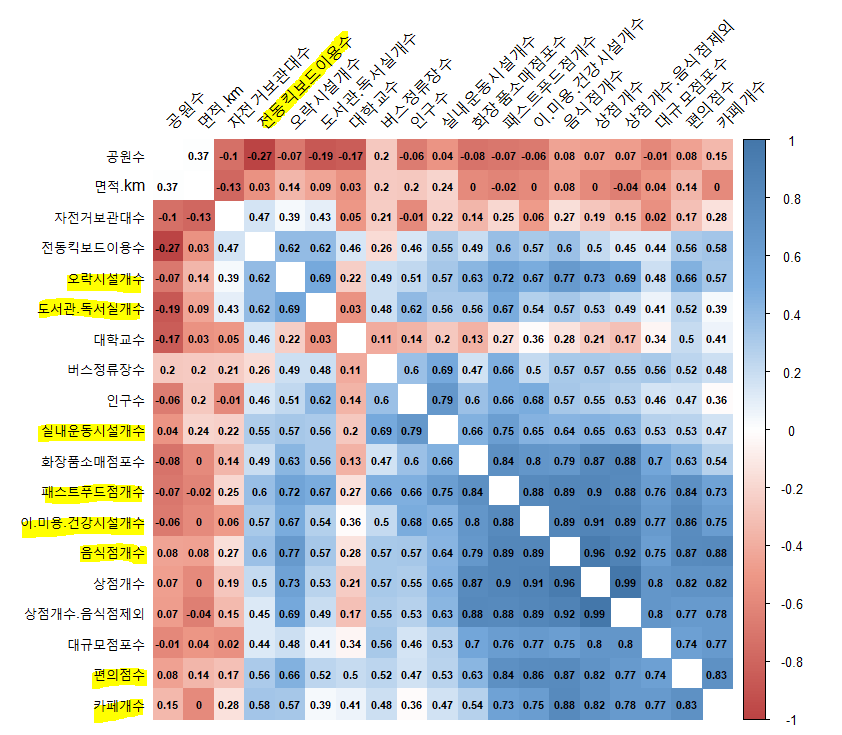

## R 코드

In [ ]:


#################################################################################
#################################################################################
R 코드 ##########################################################################
#################################################################################
#################################################################################

pop <- read.csv("C:/Users/WIN10/성민지/데이터_5차/(중복)2019_전주시 동별 인구.csv")
#rest <- read.csv("C:/Users/WIN10/성민지/데이터_5차/(중복)동별 음식점 및 주점업 사업체수(2018).csv")
bicycle <- read.csv("C:/Users/WIN10/성민지/데이터_5차/(행정동)12_04_03_E_자전거보관소정보.csv")
bigstore <- read.csv("C:/Users/WIN10/성민지/데이터_5차/(행정동)대규모점포현황_2020.csv")
#cvstore <- read.csv("C:/Users/WIN10/성민지/데이터_5차/(행정동)동별 체인화 편의점 + 사업체수 (2018년).csv")
univ <- read.csv("C:/Users/WIN10/성민지/데이터_5차/(행정동)전주시 대학교.csv")
region <- read.csv("C:/Users/WIN10/성민지/데이터_5차/(행정동)전주시 행정동 면적.csv")
x <- read.csv("C:/Users/WIN10/성민지/데이터_5차/전북 상권정보.csv")
bus <- read.csv("C:/Users/WIN10/성민지/데이터_5차/전라북도 전주시_버스 정류장 현황_20210426.csv")
park <- read.csv("C:/Users/WIN10/성민지/데이터_5차/park.csv")
scooter <- read.csv("C:/Users/WIN10/성민지/데이터_5차/(행정동)PM_210509_0시.csv")


jjdong <- read.csv("C:/Users/WIN10/성민지/데이터_5차/전주 행정동_가나다순.csv")
jjdong <- jjdong$행정동
str(jjdong)
head(jjdong)

library(dplyr)
library(stringr)


###############################################
# 인구수 ######################################
###############################################

str(pop)
head(pop)
pop <- pop[,c(2,3)]
names(pop) <- c("행정동", "인구수")

table(pop$행정동 %in% jjdong)
table(jjdong %in% pop$행정동)

pop$행정동[pop$행정동 %in% jjdong == FALSE] #jjdong에는 없는 pop의 행정동
jjdong[jjdong %in% pop$행정동 == FALSE] #pop에는 없는 jjdong의 행정동

pop$행정동[which(pop$행정동 == "동산동")] <- "여의동" ## 19년 8월에 동산동을 여의동으로 변경, https://www.hani.co.kr/arti/area/honam/905848.html?_fr=mt2
pop <- arrange(pop, pop$행정동)
pop






###############################################
# 자전거 보관대 수 ############################
###############################################

str(bicycle)
head(bicycle)

bicycle <- bicycle[, 1:8]
bicycle1 <- bicycle %>% group_by(행정동) %>% summarise(자전거보관대수 = sum(보관대수))
bicycle1 <- as.data.frame(bicycle1)

table(bicycle1$행정동 %in% jjdong)
table(jjdong %in% bicycle1$행정동)
jjdong[jjdong %in% bicycle1$행정동 == FALSE]

add <- data.frame(행정동 = jjdong[jjdong %in% bicycle1$행정동 == FALSE], 
                     자전거보관대수 = rep(median(bicycle1$자전거보관대수), times = length(jjdong[jjdong %in% bicycle1$행정동 == FALSE])))
bicycle1 <- rbind(bicycle1, add)
bicycle1 <- arrange(bicycle1, bicycle1$행정동)
bicycle1




###############################################
# 대규모점포 수 ###############################
###############################################

str(bigstore)
head(bigstore)

bigstore <- bigstore[,2:4]
bigstore1 <- bigstore
bigstore1$count <- rep(1,nrow(bigstore1))

bigstore1 <- bigstore1 %>% group_by(행정동) %>% summarise(대규모점포수 = sum(count))
bigstore1 <- as.data.frame(bigstore1)

table(bigstore1$행정동 %in% jjdong)
table(jjdong %in% bigstore1$행정동)
jjdong[jjdong %in% bigstore1$행정동 == FALSE]

add <- data.frame(행정동 = jjdong[jjdong %in% bigstore1$행정동 == FALSE], 
                     대규모점포수 = rep(0, length(jjdong[jjdong %in% bigstore1$행정동 == FALSE])))
bigstore1 <- rbind(bigstore1, add)
bigstore1 <- arrange(bigstore1, bigstore1$행정동)
bigstore1



###############################################
# 편의점 수 ###################################
###############################################

#str(cvstore)
#head(cvstore)
#cvstore <- cvstore[,c(2,4)]
#names(cvstore)[1] <- "행정동"
#cvstore <- arrange(cvstore, cvstore$행정동)
#table(cvstore$행정동 %in% jjdong)
#table(jjdong %in% cvstore$행정동)
#jjdong[jjdong %in% cvstore$행정동 == FALSE] #cvstore에는 없는 jjdong의 행정동
#add <- data.frame(행정동 = jjdong[jjdong %in% cvstore$행정동 == FALSE], 
#                     편의점수 = rep(median(cvstore$편의점수), length(jjdong[jjdong %in% cvstore$행정동 == FALSE])))
#cvstore<- rbind(cvstore, add)
#cvstore <- arrange(cvstore, cvstore$행정동)
#cvstore

str(x)
head(x)

cvstore <- x[x$표준산업분류명 == "체인화 편의점", ]
cvstore <- cvstore[grep("전주", cvstore$시군구명), ]
names(cvstore)
cvstore <- cvstore[ , c(2, 3, 11, 17, 25, 32, 38, 39)]


cvstore$행정동명[cvstore$행정동명 == "동산동"] <- "여의동"

cvstore1 <- cvstore %>% group_by(행정동명) %>% summarise(편의점수 = length(상호명))
cvstore1 <- cvstore1[-1,]
cvstore1 <- as.data.frame(cvstore1)
names(cvstore1)[1] <- "행정동"
cvstore1




###############################################
# 대학교 수 ###################################
###############################################


str(univ)
head(univ)
univ1 <- univ
univ1$count <- rep(1,nrow(univ1))
univ1 <- univ1 %>% group_by(행정동) %>% summarise(대학교수 = sum(count))
univ1 <- as.data.frame(univ1)

table(univ1$행정동 %in% jjdong)
table(jjdong %in% univ1$행정동)
jjdong[jjdong %in% univ1$행정동 == FALSE] #univ에는 없는 jjdong의 행정동
add <- data.frame(행정동 = jjdong[jjdong %in% univ1$행정동 == FALSE], 
                     대학교수 = rep(0, length(jjdong[jjdong %in% univ1$행정동 == FALSE])))
univ1 <- rbind(univ1, add)
univ1 <- arrange(univ1, univ1$행정동)
univ1





###############################################
# 면적 ########################################
###############################################

str(region)
head(region)
region <- region[,c(2,3)]
names(region) <- c("행정동", "면적.km")
region <- arrange(region, region$행정동)
table(region$행정동 %in% jjdong)
table(jjdong %in% region$행정동)
region$행정동[region$행정동 %in% jjdong == FALSE] #jjdong에는 없는 region의 행정동 #이름 오류 있는 듯 (송청1동, 품남동)
jjdong[jjdong %in% region$행정동 == FALSE] #region에는 없는 jjdong의 행정동
region




###############################################
# 상점 수 #####################################
###############################################

str(x)
head(x)

store <- x[grep("전주", x$시군구명), ]
store <- store[ , c(2, 3, 5, 7, 11, 17, 25, 32, 38, 39)]

store1 <- store %>% group_by(행정동명) %>% summarise(count = length(상호명))
store1 <- as.data.frame(store1)
store1 <- arrange(store1, store1$행정동명)
names(store1) <- c("행정동", "상점개수")

table(jjdong %in% store1$행정동)
table(store1$행정동 %in% jjdong)

jjdong[jjdong %in% store1$행정동 == FALSE] #store에는 없는 jjdong의 행정동
store1$행정동[store1$행정동 %in% jjdong == FALSE] #jjdong에는 없는 store의 행정동

which(store1$행정동 %in% jjdong == FALSE)
store1[which(store1$행정동 %in% jjdong == FALSE), ]

store1$행정동[which(store1$행정동 == "동산동")] <- "여의동"
store1 <- store1 %>% group_by(행정동) %>% summarise(상점개수 = sum(상점개수))
store1 <- as.data.frame(store1)
store1 <- arrange(store1, store1$행정동)
store1 <- store1[-1,]
store1





###############################################
# 상권지수 ####################################
###############################################


options(digits = 4)
store.rate <- store1$상점개수 / region$면적.km
store.rate <- data.frame(행정동 = jjdong, 상권지수 = store.rate)
store.rate





###############################################
# 음식점수 ####################################
###############################################

#str(rest)
#head(rest)

#rest <- rest[,c(2,4)]
#names(rest) <- c("행정동", "음식점수")

#table(rest$행정동 %in% jjdong)
#table(jjdong %in% rest$행정동)
#jjdong[jjdong %in% rest$행정동 == FALSE]

#rest <- arrange(rest, rest$행정동)
#rest


str(x)
head(x)
str(store)
head(store)

View(store10)

store10 <- store[store$상권업종대분류명 == "음식", ]
store10 <- store10 %>% group_by(행정동명) %>% summarise(count = length(상호명))
store10 <- as.data.frame(store10)
names(store10) <- c("행정동", "음식점개수ㅍ")

table(jjdong %in% store10$행정동)
table(store10$행정동 %in% jjdong)

jjdong[jjdong %in% store10$행정동 == FALSE] #store10에는 없는 jjdong의 행정동
store10$행정동[store10$행정동 %in% jjdong == FALSE] #jjdong에는 없는 store10의 행정동

store10$행정동[which(store10$행정동 == "동산동")] <- "여의동"
store10 <- store10[-1,]
store10 <- store10 %>% group_by(행정동) %>% summarise(음식점개수 = sum(음식점개수ㅍ))
store10 <- as.data.frame(store10)
store10 <- arrange(store10, store10$행정동)

store10







###############################################
# 상점 수 (음식점 제외) #######################
###############################################

str(x)
head(x)
str(store)
head(store)

store2 <- store[store$상권업종대분류명 != "음식", ]
store2 <- store2 %>% group_by(행정동명) %>% summarise(count = length(상호명))
store2 <- as.data.frame(store2)
names(store2) <- c("행정동", "상점개수ㅍ")

table(jjdong %in% store2$행정동)
table(store2$행정동 %in% jjdong)

jjdong[jjdong %in% store2$행정동 == FALSE] #store2에는 없는 jjdong의 행정동
store2$행정동[store2$행정동 %in% jjdong == FALSE] #jjdong에는 없는 store2의 행정동

which(store2$행정동 %in% jjdong == FALSE)
store2[which(store2$행정동 %in% jjdong == FALSE), ]

store2$행정동[which(store2$행정동 == "동산동")] <- "여의동"
store2 <- store2[-1,]
store2 <- store2 %>% group_by(행정동) %>% summarise(상점개수.음식점제외 = sum(상점개수ㅍ))
store2 <- as.data.frame(store2)
store2 <- arrange(store2, store2$행정동)

store2






###############################################
# 카페 수 #####################################
###############################################

str(x)
head(x)
str(store)
head(store)

store3 <- store[store$상권업종중분류명 == "커피점/카페", ]
store3 <- store3 %>% group_by(행정동명) %>% summarise(count = length(상호명))
store3 <- as.data.frame(store3)
names(store3) <- c("행정동", "카페개수ㅍ")

table(jjdong %in% store3$행정동)
table(store3$행정동 %in% jjdong)

jjdong[jjdong %in% store3$행정동 == FALSE] #store3에는 없는 jjdong의 행정동
store3$행정동[store3$행정동 %in% jjdong == FALSE] #jjdong에는 없는 store3의 행정동

which(store3$행정동 %in% jjdong == FALSE)
store3[which(store3$행정동 %in% jjdong == FALSE), ]

store3$행정동[which(store3$행정동 == "동산동")] <- "여의동"
store3 <- store3[-1,]
store3 <- store3 %>% group_by(행정동) %>% summarise(카페개수 = sum(카페개수ㅍ))
store3 <- as.data.frame(store3)
store3 <- arrange(store3, store3$행정동)

store3







###############################################
# 패스트푸드점 수 #############################
###############################################

str(x)
head(x)
str(store)
head(store)

View(store4)

store4 <- store[store$상권업종중분류명 == "패스트푸드", ]
store4 <- store4 %>% group_by(행정동명) %>% summarise(count = length(상호명))
store4 <- as.data.frame(store4)
names(store4) <- c("행정동", "패스트푸드점수ㅍ")

table(jjdong %in% store4$행정동)
table(store4$행정동 %in% jjdong)

jjdong[jjdong %in% store4$행정동 == FALSE] #store4에는 없는 jjdong의 행정동
store4$행정동[store4$행정동 %in% jjdong == FALSE] #jjdong에는 없는 store4의 행정동

add <- data.frame(행정동 = jjdong[jjdong %in% store4$행정동 == FALSE], 
                     패스트푸드점수ㅍ = rep(0, length(jjdong[jjdong %in% store4$행정동 == FALSE])))
store4 <- rbind(store4, add)
store4 <- arrange(store4, store4$행정동)

store4$행정동[which(store4$행정동 == "동산동")] <- "여의동"
store4 <- store4[-1,]
store4 <- store4 %>% group_by(행정동) %>% summarise(패스트푸드점개수 = sum(패스트푸드점수ㅍ))
store4 <- as.data.frame(store4)
store4 <- arrange(store4, store4$행정동)

store4



###############################################
# PC방/오락/당구장/볼링장 수 ##################
###############################################

str(x)
head(x)
str(store)
head(store)

store5 <- store[store$상권업종중분류명 == "PC/오락/당구/볼링등", ]
store5 <- store5 %>% group_by(행정동명) %>% summarise(count = length(상호명))
store5 <- as.data.frame(store5)
names(store5) <- c("행정동", "오락시설개수ㅍ")

table(jjdong %in% store5$행정동)
table(store5$행정동 %in% jjdong)

jjdong[jjdong %in% store5$행정동 == FALSE] #store5에는 없는 jjdong의 행정동
store5$행정동[store5$행정동 %in% jjdong == FALSE] #jjdong에는 없는 store5의 행정동

add <- data.frame(행정동 = jjdong[jjdong %in% store5$행정동 == FALSE], 
                     오락시설개수ㅍ = rep(0, length(jjdong[jjdong %in% store5$행정동 == FALSE])))
store5 <- rbind(store5, add)
store5 <- arrange(store5, store5$행정동)

store5$행정동[which(store5$행정동 == "동산동")] <- "여의동"
store5 <- store5 %>% group_by(행정동) %>% summarise(오락시설개수 = sum(오락시설개수ㅍ))
store5 <- as.data.frame(store5)
store5 <- arrange(store5, store5$행정동)

store5





###############################################
# 도서관/독서실 수 ############################
###############################################

str(x)
head(x)
str(store)
head(store)

store6 <- store[store$상권업종중분류명 == "도서관/독서실", ]
store6 <- store6 %>% group_by(행정동명) %>% summarise(count = length(상호명))
store6 <- as.data.frame(store6)
names(store6) <- c("행정동", "도서관.독서실개수ㅍ")

table(jjdong %in% store6$행정동)
table(store6$행정동 %in% jjdong)

jjdong[jjdong %in% store6$행정동 == FALSE] #store6에는 없는 jjdong의 행정동
store6$행정동[store6$행정동 %in% jjdong == FALSE] #jjdong에는 없는 store6의 행정동

add <- data.frame(행정동 = jjdong[jjdong %in% store6$행정동 == FALSE], 
                     도서관.독서실개수ㅍ = rep(0, length(jjdong[jjdong %in% store6$행정동 == FALSE])))
store6 <- rbind(store6, add)
store6 <- arrange(store6, store6$행정동)

store6$행정동[which(store6$행정동 == "동산동")] <- "여의동"
store6 <- store6 %>% group_by(행정동) %>% summarise(도서관.독서실개수 = sum(도서관.독서실개수ㅍ))
store6 <- as.data.frame(store6)
store6 <- arrange(store6, store6$행정동)

store6





###############################################
# 실내운동시설 수 #############################
###############################################

str(x)
head(x)
str(store)
head(store)

View(store7)

store7 <- store[store$상권업종중분류명 == "실내운동시설", ]
store7 <- store7 %>% group_by(행정동명) %>% summarise(count = length(상호명))
store7 <- as.data.frame(store7)
names(store7) <- c("행정동", "실내운동시설개수ㅍ")

table(jjdong %in% store7$행정동)
table(store7$행정동 %in% jjdong)

jjdong[jjdong %in% store7$행정동 == FALSE] #store7에는 없는 jjdong의 행정동
store7$행정동[store7$행정동 %in% jjdong == FALSE] #jjdong에는 없는 store7의 행정동

add <- data.frame(행정동 = jjdong[jjdong %in% store7$행정동 == FALSE], 
                     실내운동시설개수ㅍ = rep(0, length(jjdong[jjdong %in% store7$행정동 == FALSE])))
store7 <- rbind(store7, add)
store7 <- arrange(store7, store7$행정동)

store7$행정동[which(store7$행정동 == "동산동")] <- "여의동"
store7 <- store7 %>% group_by(행정동) %>% summarise(실내운동시설개수 = sum(실내운동시설개수ㅍ))
store7 <- as.data.frame(store7)
store7 <- arrange(store7, store7$행정동)

store7




###############################################
# 이/미용/건강시설 수 #########################
###############################################

str(x)
head(x)
str(store)
head(store)

store8 <- store[store$상권업종중분류명 == "이/미용/건강", ]
store8 <- store8 %>% group_by(행정동명) %>% summarise(count = length(상호명))
store8 <- as.data.frame(store8)
names(store8) <- c("행정동", "이.미용.건강시설개수ㅍ")

table(jjdong %in% store8$행정동)
table(store8$행정동 %in% jjdong)

jjdong[jjdong %in% store8$행정동 == FALSE] #store8에는 없는 jjdong의 행정동
store8$행정동[store8$행정동 %in% jjdong == FALSE] #jjdong에는 없는 store8의 행정동

#add <- data.frame(행정동 = jjdong[jjdong %in% store7$행정동 == FALSE], 
#                     실내운동시설개수ㅍ = rep(0, length(jjdong[jjdong %in% store7$행정동 == FALSE])))
#store8 <- rbind(store8, add)
#store8 <- arrange(store8, store8$행정동)

store8$행정동[which(store8$행정동 == "동산동")] <- "여의동"
store8 <- store8[-1,]
store8 <- store8 %>% group_by(행정동) %>% summarise(이.미용.건강시설개수 = sum(이.미용.건강시설개수ㅍ))
store8 <- as.data.frame(store8)
store8 <- arrange(store8, store8$행정동)

store8





###############################################
# 화장품소매점포 수 ###########################
###############################################

str(x)
head(x)
str(store)
head(store)
View(store9)

store9 <- store[store$상권업종중분류명 == "화장품소매", ]
store9 <- store9 %>% group_by(행정동명) %>% summarise(count = length(상호명))
store9 <- as.data.frame(store9)
names(store9) <- c("행정동", "화장품소매점포수ㅍ")

table(jjdong %in% store9$행정동)
table(store9$행정동 %in% jjdong)

jjdong[jjdong %in% store9$행정동 == FALSE] #store9에는 없는 jjdong의 행정동
store9$행정동[store9$행정동 %in% jjdong == FALSE] #jjdong에는 없는 store9의 행정동

add <- data.frame(행정동 = jjdong[jjdong %in% store9$행정동 == FALSE], 
                     화장품소매점포수ㅍ = rep(0, length(jjdong[jjdong %in% store9$행정동 == FALSE])))
store9 <- rbind(store9, add)
store9 <- arrange(store9, store9$행정동)

store9$행정동[which(store9$행정동 == "동산동")] <- "여의동"
store9 <- store9[-1,]
store9 <- store9 %>% group_by(행정동) %>% summarise(화장품소매점포수 = sum(화장품소매점포수ㅍ))
store9 <- as.data.frame(store9)
store9 <- arrange(store9, store9$행정동)

store9






###############################################
# 버스 정류장 수 ##############################
###############################################

options(digits = 9)
str(bus)
head(bus)


bus1 <- bus[,c(1,5)]
bus1$행정동 <- str_trim(bus1$행정동, side=c("both"))
bus1 <- bus1 %>% group_by(행정동) %>% summarise(버스정류장수 = length(설치.지점명))
bus1 <- as.data.frame(bus1)
bus1 <- arrange(bus1, bus1$행정동)

table(jjdong %in% bus1$행정동)
bus1



###############################################
# 공원 수 #####################################
###############################################

str(park)
head(park)

park <- park[, c(4,13,22,23)]
park1 <- park
park1$parkLoadAddr <- c("팔복동", "중앙동", "풍남동", "여의동", "여의동",
                       "우아2동", "송천2동", "송천2동", "우아2동", "팔복동")
park1 <- park1 %>% group_by(parkLoadAddr) %>% summarise(공원수 = length(dataTitle))
park1 <- as.data.frame(park1)
names(park1)[1] <- "행정동"

table(jjdong %in% park1$행정동)
table(park1$행정동 %in% jjdong)
jjdong[jjdong %in% park1$행정동 == FALSE] #park에는 없는 jjdong의 행정동
add <- data.frame(행정동 = jjdong[jjdong %in% park1$행정동 == FALSE], 
                     공원수 = rep(0, length(jjdong[jjdong %in% park1$행정동 == FALSE])))
park1 <- rbind(park1, add)
park1 <- arrange(park1, park1$행정동)
park1




###############################################
# 전동킥보드 수 ###############################
###############################################

str(scooter)
head(scooter)

scooter <- scooter[, c(2,6)]
names(scooter) <- c("행정동", "전동킥보드이용수")
scooter <- arrange(scooter, scooter$행정동)

table(jjdong %in% scooter$행정동)
scooter


df <- data.frame(전동킥보드 = scooter$행정동, 자전거 = bicycle1$행정동,
                      대규모점포 = bigstore1$행정동, 버스정류장 = bus1$행정동,
                      편의점 = cvstore1$행정동, 공원 = park1$행정동,
                      인구 = pop$행정동, 면적 = region$행정동,
                      음식점 = store10$행정동, 상점 = store1$행정동,
                      음식점제외 = store2$행정동, 대학교 = univ1$행정동, 
                      카페개수 = store3$행정동, 패스트푸드점개수 = store4$행정동,
                      오락시설개수 = store5$행정동, 도서관.독서실개수 = store6$행정동,
                      실내운동시설개수 = store7$행정동, 이.미용.건강시설개수 = store8$행정동,
                      화장품소매점포수 = store9$행정동)
df
                 


###############################################
# 최종 데이터셋 jj ############################
###############################################

jj <- merge(scooter, bicycle1)
jj <- merge(jj, bigstore1)
jj <- merge(jj, bus1)
jj <- merge(jj, cvstore1)
jj <- merge(jj, park1)
jj <- merge(jj, pop)
jj <- merge(jj, region)
#jj <- merge(jj, rest)
jj <- merge(jj, store1)
jj <- merge(jj, store2)
jj <- merge(jj, univ1)
jj <- merge(jj, store3)
jj <- merge(jj, store4)
jj <- merge(jj, store5)
jj <- merge(jj, store6)
jj <- merge(jj, store7)
jj <- merge(jj, store8)
jj <- merge(jj, store9)
jj <- merge(jj, store10)

jj


#write.csv(store2, file = '음식점제외모든상점.csv')
#write.csv(store3, file = '카페.csv')
#write.csv(store4, file = '패스트푸드점.csv')
#write.csv(store5, file = 'PC+오락+당구+볼링등.csv')
#write.csv(store6, file = '도서관+독서실.csv')
#write.csv(store7, file = '실내운동시설.csv')
#write.csv(store8, file = '이+미용+건강.csv')
#write.csv(store9, file = '화장품소매.csv')
#write.csv(store10, file = '음식점.csv')

#write.csv(jj, file = 'jj.csv')
#write.csv(bicycle, file = 'bicycle.csv')
#write.csv(bigstore, file = 'bigstore.csv')
#write.csv(bus, file = 'bus.csv')
#write.csv(cvstore, file = 'cvstore.csv')
#write.csv(park, file = 'park.csv')
#write.csv(store, file = 'store.csv')
#write.csv(univ, file = 'univ.csv')


jj <- jj[,-1]



###############################################
# 상관분석 ####################################
###############################################


library(corrplot) 
cor.jj <- cor(jj) 
round(cor.jj, 2) 
corrplot(cor.jj, method='number', shade.col=NA, tl.col='black', tl.srt=45)

col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
corrplot(cor.jj, method='color', col = col(200), order = 'hclust', number.cex = .7,
         addCoef.col = 'black', tl.col = 'black', tl.srt = 45, sig.level = 0.01, insig = 'blank', diag = FALSE)


cor.test(jj$전동킥보드이용수, jj$자전거보관대수)
cor.test(jj$전동킥보드이용수, jj$대규모점포수)
cor.test(jj$전동킥보드이용수, jj$버스정류장수) #유의 X
cor.test(jj$전동킥보드이용수, jj$편의점수)
cor.test(jj$전동킥보드이용수, jj$공원수) #유의 X
cor.test(jj$전동킥보드이용수, jj$인구수)
cor.test(jj$전동킥보드이용수, jj$면적.km) #유의 X
cor.test(jj$전동킥보드이용수, jj$음식점수)
cor.test(jj$전동킥보드이용수, jj$상점개수)
cor.test(jj$전동킥보드이용수, jj$상점개수.음식점제외)
cor.test(jj$전동킥보드이용수, jj$대학교수)
cor.test(jj$전동킥보드이용수, jj$카페개수)
cor.test(jj$전동킥보드이용수, jj$패스트푸드점개수)
cor.test(jj$전동킥보드이용수, jj$오락시설개수)
cor.test(jj$전동킥보드이용수, jj$도서관.독서실개수)
cor.test(jj$전동킥보드이용수, jj$실내운동시설개수)
cor.test(jj$전동킥보드이용수, jj$이.미용.건강시설개수)
cor.test(jj$전동킥보드이용수, jj$화장품소매점포수)
cor.test(jj$전동킥보드이용수, jj$음식점개수)


